In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import segmentation_gmm as seg_gmm
import segmentation_watershed as seg_water
from methods import main_methods as mm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# 2 component data
#data_file = "/Users/diegotorrejon/Projects/Other/SSTS/data/2componentfilms/combined/PTB7PC71BM_CBonly_ascast_fresh_500_nm_combined.npy"

# nanowires data
data_file = "/Users/diegotorrejon/Projects/Other/SSTS/data/nanowires/combined/100-0_48_NW_combined.npy"

data_type = data_file.split("/")[-3]
data = np.load(data_file)


/Users/diegotorrejon/Projects/Other/SSTS/VENV/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/diegotorrejon/Projects/Other/SSTS/VENV/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


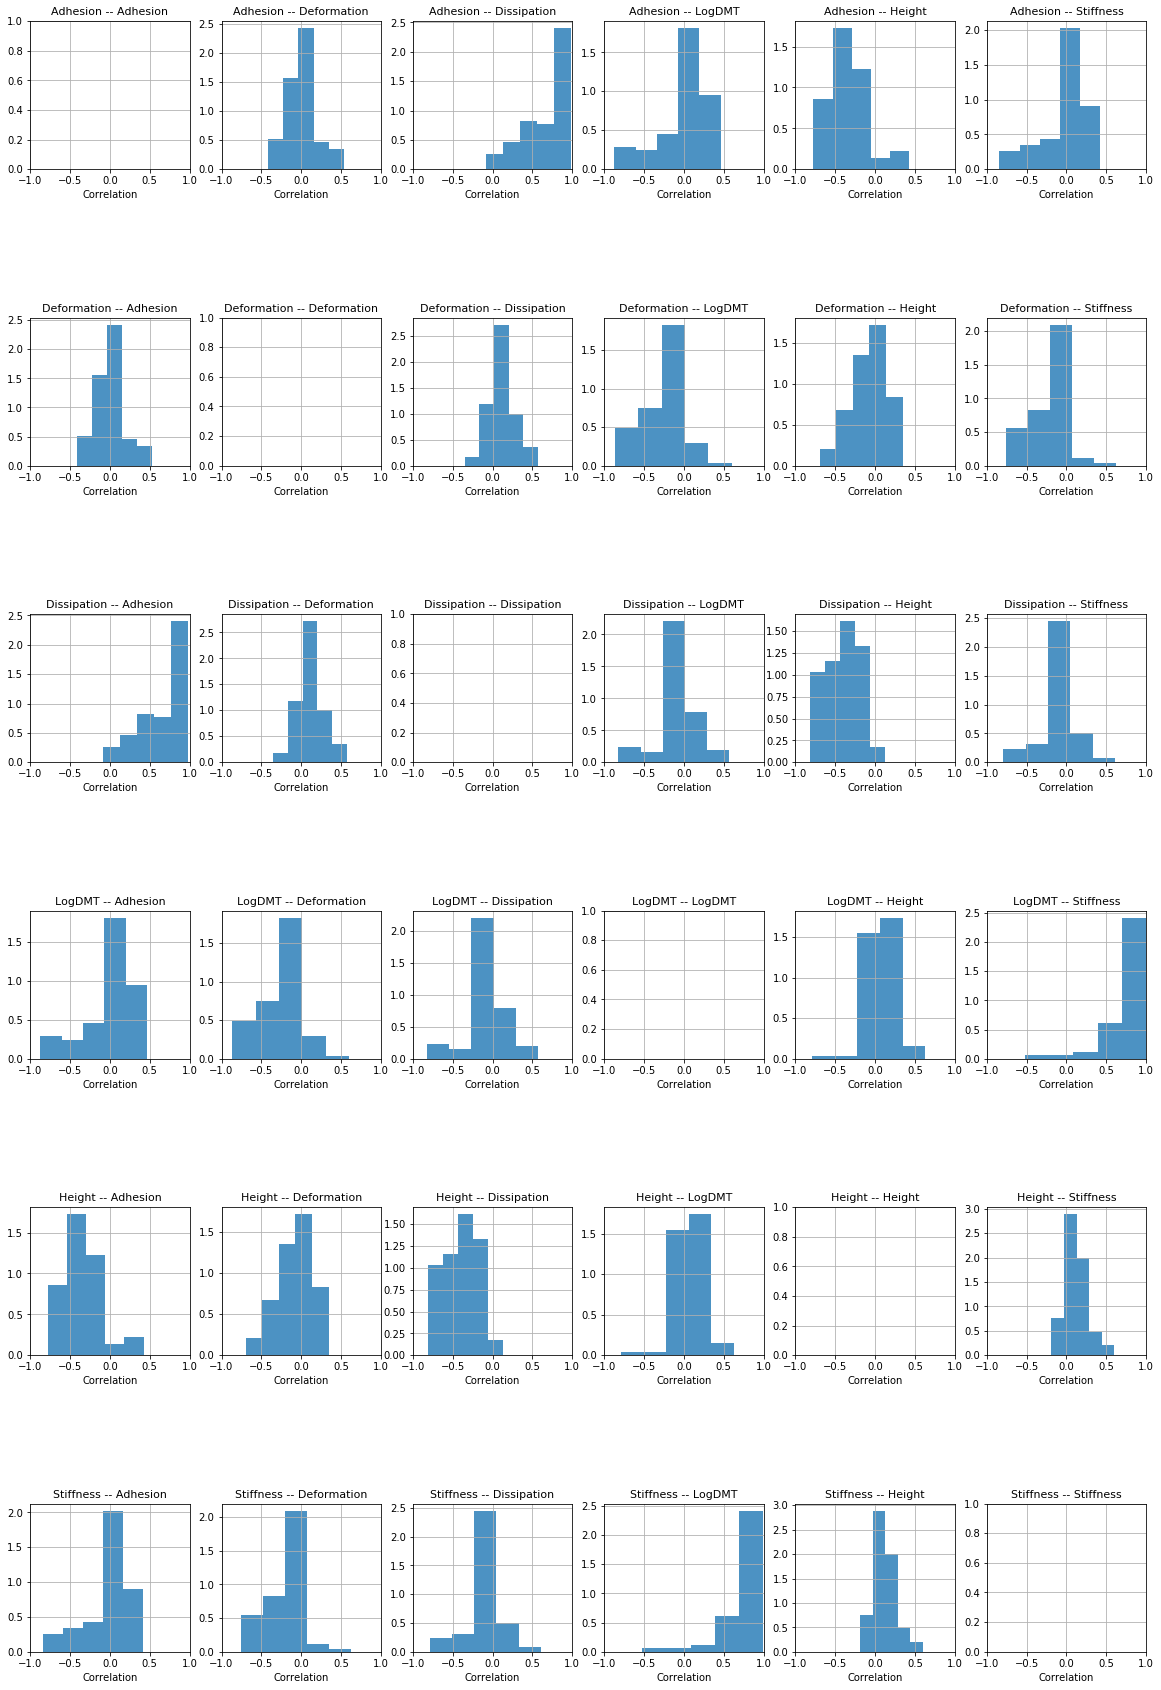

In [13]:
# NOTE: I picked backgrounded because it has the most data files
data_dir = "/Users/diegotorrejon/Dropbox/SSTS_files/AFM/QNM/Backgrounded/Combined/"
mm.show_correlations(data.shape[2], data_dir)


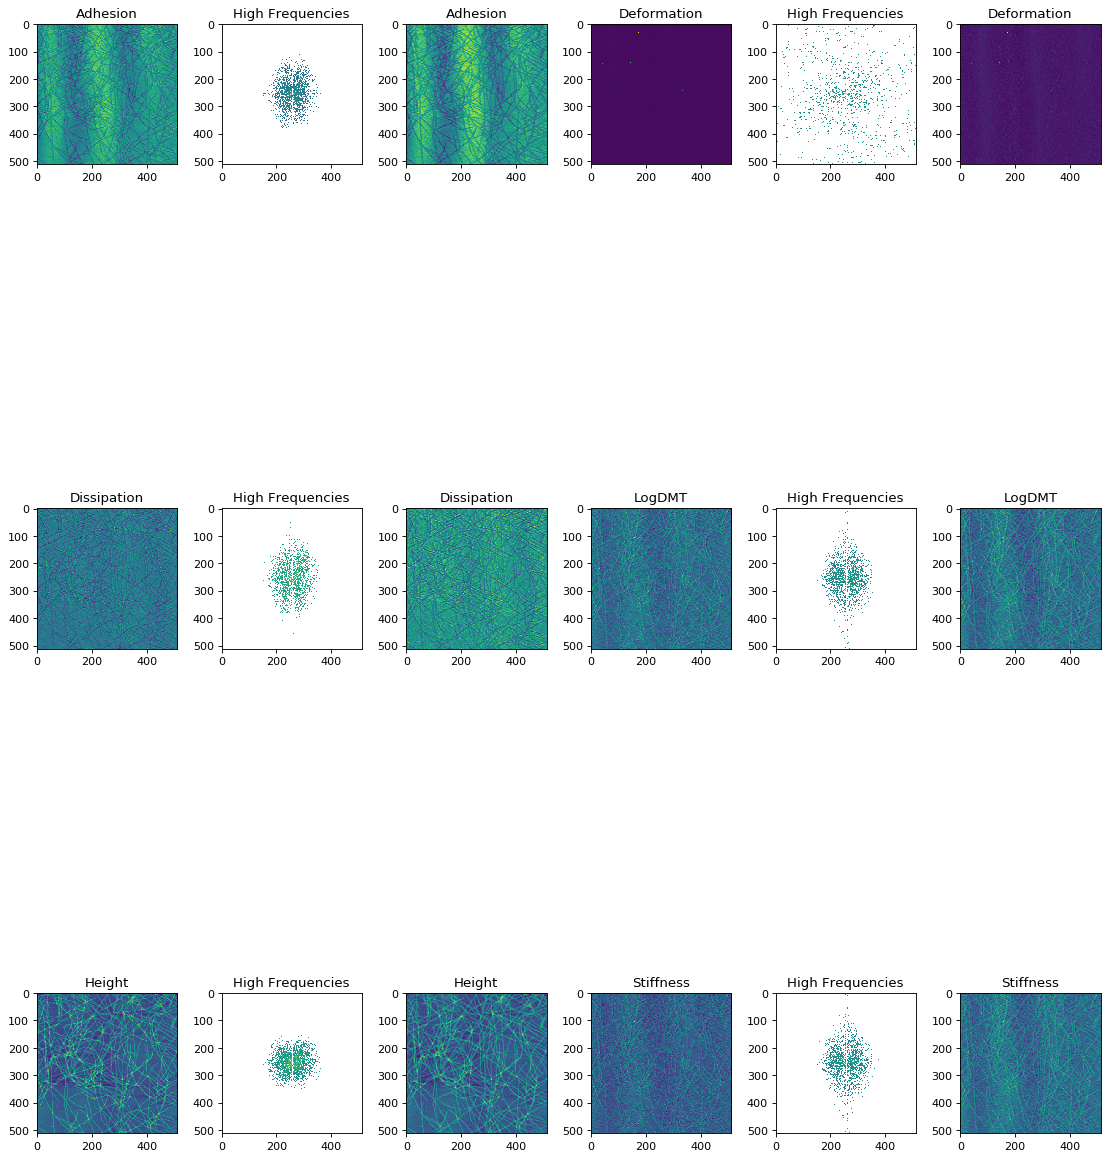

In [14]:
# Apply high pass filter
data = mm.apply_frequency_removal(data)


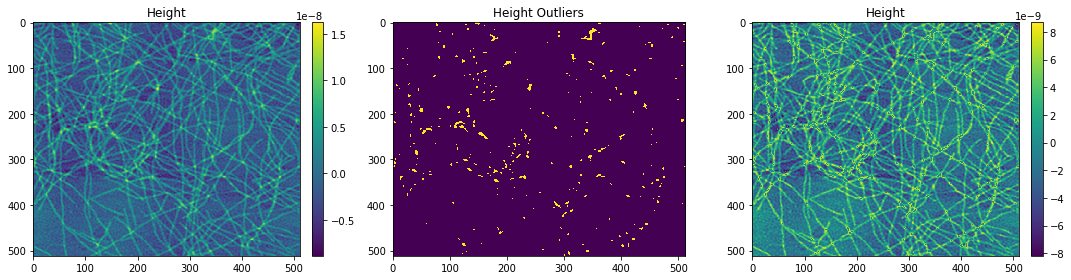

In [15]:
# Get (z-score) outliers
outliers = mm.extract_outliers(data)
mm.show_outliers(data, outliers)

no_outliers_data = np.copy(data)
no_outliers_data[outliers == 1] = 0


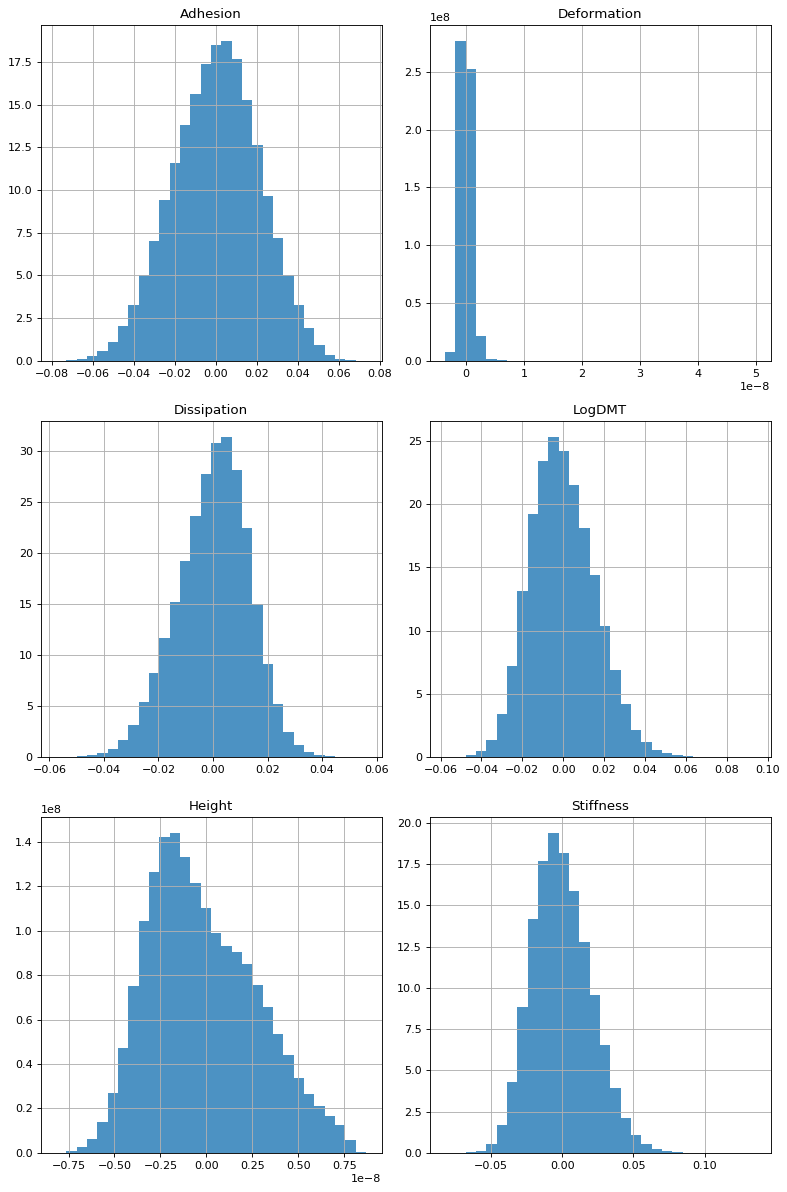

In [16]:
# Show a-priori property distributions
mm.show_property_distributions(data, outliers)


In [18]:
# Apply semantic segmentation (GMM)
num_pca_components = 4
seg = seg_gmm.SegmenterGMM(n_components=2, embedding_dim=num_pca_components,
                           nonlinear=True, normalize=True,
                          padding=0, zscale=False)
pre_labels = seg.fit_transform(no_outliers_data, outliers)


/Users/diegotorrejon/Projects/Other/SSTS/ssts/segmentation/segmentation_gmm.py:207: RuntimeWarning: divide by zero encountered in true_divide
  reciprocal_data = 1 / data


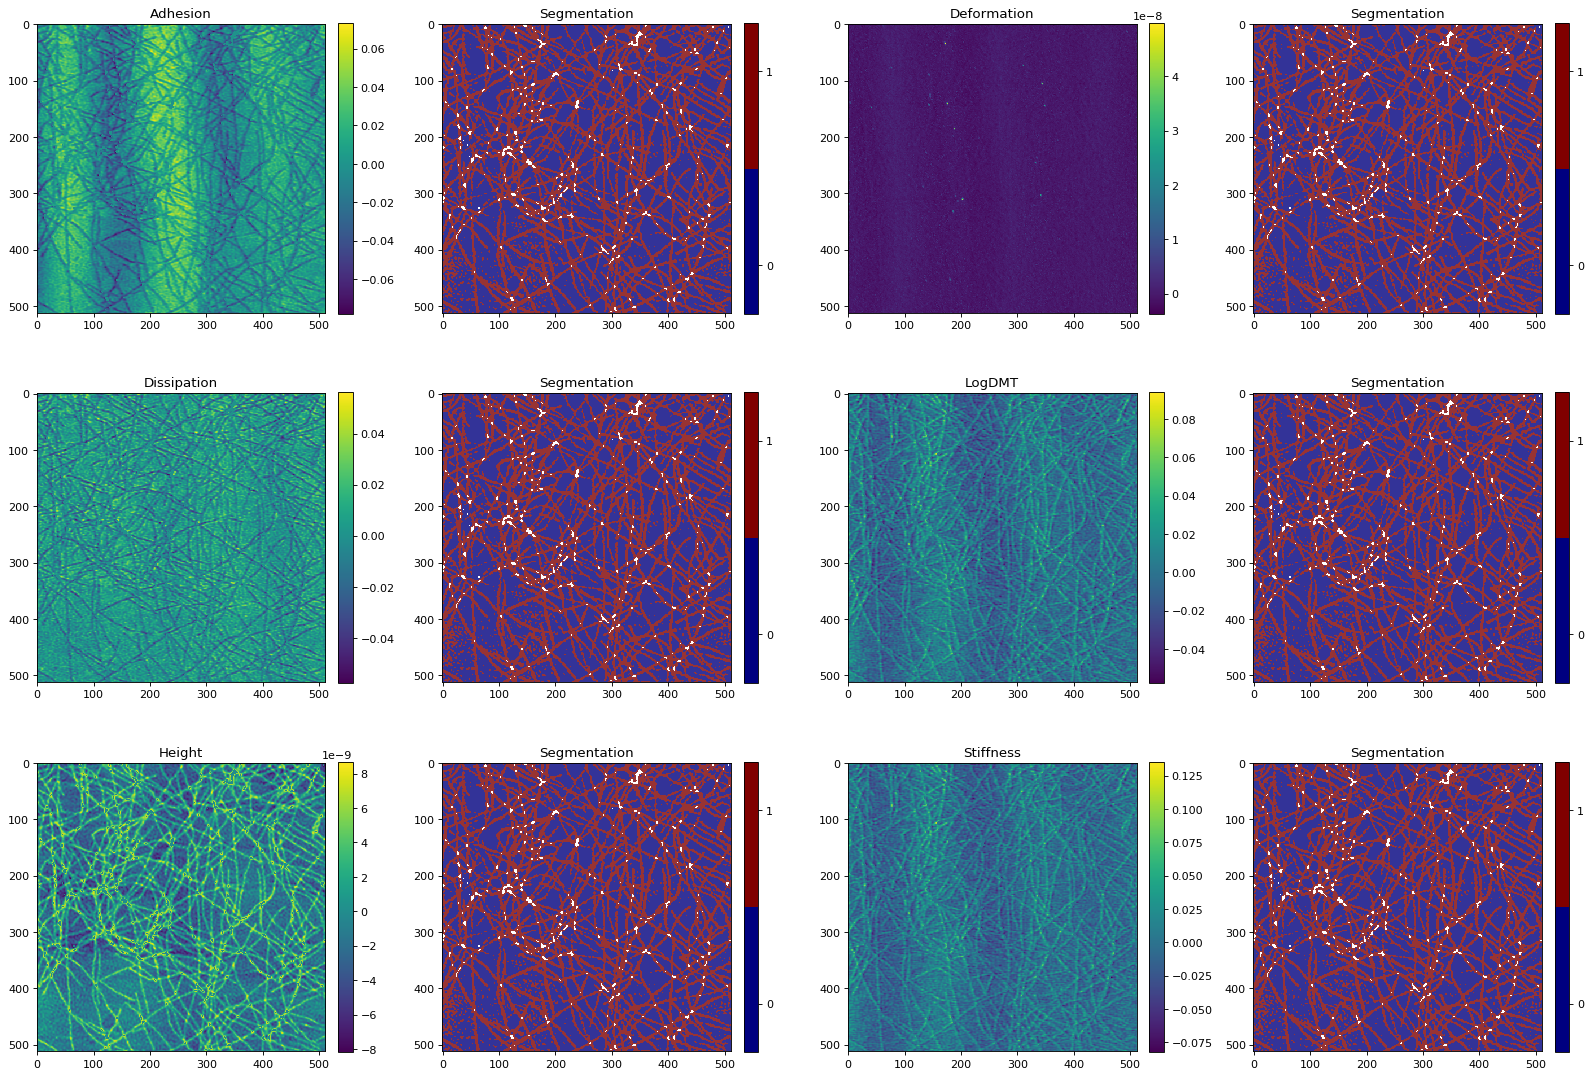

In [19]:
# Semantic segmentation of properties
mm.show_classification(pre_labels, no_outliers_data)


In [ ]:
# Semantic segmentation likelihood of properties
probs = seg.get_probabilities(data)
mm.show_overlaid_distribution(probs, no_outliers_data)


In [ ]:
# Distributions of properties after semantic segmentation
mm.show_classification_distributions(pre_labels, no_outliers_data)


In [ ]:
# Scatter plot and correlation of properties after semantic segmentation
mm.show_classification_correlation(pre_labels, no_outliers_data)


In [ ]:
# Distributions of PCA components after semantic segmentation
h, w, c = data.shape
pca_components = seg.get_pca_components(data)
pca_components = pca_components.reshape(h, w, num_pca_components)

mm.show_classification_distributions(pre_labels, pca_components, title_flag=False)


In [ ]:
# Scatter plot and correlation of PCA components after semantic segmentation
mm.show_classification_correlation(pre_labels, pca_components, title_flag=False)


In [ ]:
# Apply instance segmentation (connected components)
post_labels = seg.get_grains(pre_labels)


In [ ]:
# Instance (grains) segmentation of properties
mm.show_classification(post_labels, no_outliers_data)


In [ ]:
# Show grain area distribution after instance segmentation
mm.show_grain_area_distribution(post_labels, data_type)


In [ ]:
# Distributions of grains after instance segmentation
mm.show_distributions_together(post_labels, no_outliers_data)


In [ ]:
# Apply instance segmentation (persistence watershed)
seg = seg_water.SegmenterWatershed()
height_data = data[:, :, 4]
labels = seg.fit_transform(height_data, outliers, 0.4)


In [ ]:
# Instance (grains) segmentation of properties
mm.show_classification(labels, data)


In [ ]:
# Show grain area distribution after instance segmentation
mm.show_grain_area_distribution(labels, data_type)

In [ ]:
# Distributions of grains after instance segmentation
mm.show_classification_distributions(labels, data)
